# A/B Test for BouncingTramp

The following script analyzes the user's experience for two versions of BouncingTramp, which was an Exergame designed to be implemented on the Interactive Trampolines of LimaCode (http://limacodeplay.com/).
With Exergame, I'm referring to those active video-games that intentionally demand intense physical effort using Full-Body Interfaces.
The design and development of Exergames is a complex issue that requires the consultation of the previous designs of Exertion Interfaces, and research areas such as Full-body Interaction, Engagement theories or Design methods. If you are interested in getting into the theoretical part that supported this project, I would suggest you take a look at my Master Thesis document ().

To get a clearer idea about how BouncingTramp looks like, here you can see a video of me playing it: https://www.youtube.com/watch?v=ShMg41sUu_Q

Previously, the prefered movements of target users of trampolines were analyzed. Thus, two versions of BouncingTramp were developed with the single difference of the movements (jumps) implemented to control de video-game:
* Low Floor version. The game was controlled by performing the most frequent and natural movements for the users.
* High Ceiling version. The game was controlled by performing the most unusual and unnatural movements for the users.

Along this script, the results of the performance of the users (measure through their game score) and the values provided by filling out an Experience Questionnaire, are analyzing with the purpose of finding correct levels of challenging for different levels of expertise.


### Importing Libraries

In [1]:
import numpy as np
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import mannwhitneyu as utest
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

### Experience Questionnaire Values

Each of the participants played one single version of BouncingTramp, either Low Floor (group A) or High Ceiling (group B).
After playing the Exergame for 6 minutes, the participants filled out an Experience Questionnaire with 6 dimensions:
* Game Experience.
* Tiredness.
* Immersion.
* Competency.
* Difficulty.
* Positive Experience.
* Negative Experience.

In the next cells are represented as the mean for each of these dimensions in each of the participants.

In [2]:
#GROUP A Dimmensions (Low Floor)

mGameExpA = 4, 4.125, 2.875, 4.625, 4.5, 4, 3.625, 3.75, 3.75, 4.5, 4.75, 4, 4.625, 4.125, 3.25
mTirednessA = 1.75, 3.75, 3, 1.75, 3.5, 3.5, 2.75, 1.75, 3.5, 1, 1.75, 2.75, 2.25, 3.75, 3
mImmersionA = 3.25, 3.25, 4.25, 5, 4.25, 3.75, 3.5, 3, 3.5, 4, 4.75, 3, 5, 4.25, 3.5
mCompetencyA = 3.25, 2.25, 2, 5, 3.75, 3, 2.75, 2.5, 4, 5, 4, 2.75, 4, 5, 2.25
mDifficultyA = 3.5, 2, 3.25, 3.25, 3.5, 2.75, 3, 1.75, 3.25, 3.5, 3.25, 2.75, 2, 3.25, 3.25
mPosExpA = 3.75, 3.25, 3, 5, 4.5, 3.5, 4, 3.25, 4, 5, 4.5, 3.75, 5, 5, 3
mNegExpA = 2, 1.75, 2.5, 1, 1.25, 1.5, 1.5, 2, 1, 1, 1, 1, 1, 1, 2

In [3]:
#GROUP B Dimmensions (High Ceiling)

mGameExpB = 3.5, 3.75, 3.75, 3.5, 3.25, 3.125, 3.875, 3.625, 4.125, 4.375, 4.25, 3.25, 3.875, 3.375, 3.875
mTirednessB = 3.75, 3, 3.75, 3.25, 3.75, 3.5, 3.5, 1.5, 3, 3.5, 2.5, 2.75, 4, 3.25, 4
mImmersionB = 4.25, 4.5, 3.5, 3.75, 4.25, 4, 3.75, 3.25, 3, 3.75, 4, 3.5, 3.25, 3.25, 4.25
mCompetencyB = 1.75, 3, 3.5, 3.75, 3.75, 2, 3.75, 3.5, 3.25, 4.25, 3.25, 2.75, 2.75, 2.5, 2.75
mDifficultyB = 4.25, 4.25, 3, 4, 4, 3, 3.25, 2.75, 3.25, 3.75, 3, 3.5, 2.75, 2.75, 3
mPosExpB = 4, 3.5, 4, 4.25, 3.75, 3, 3.5, 4, 4, 4.25, 4.25, 3, 2.5, 3.25, 4.25
mNegExpB = 2, 1.25, 2, 2.25, 2.5, 2.5, 3, 1, 1.75, 2, 2, 2.25, 2, 1.75, 1.75

### Normality tests

Shapiro test is applied to pick appropriately the statistic test with which find significant differences between groups of dimensions. While the dimension analyzed does not present Normal Distribution in both of the groups, a non-parametric test should be used. On the other hand, if both groups present normality in their distribution for a given dimension, a parametric test would be used.

The statistic value used to settle normality is p-value, the second value provided by the Shapiro test. If this value is lower than .05, the distribution is understood as normal.

We can see that only the dimension Difficulty present normality in both groups.

In [4]:
# Normality tests

normalityGameExpA = shapiro(mGameExpA)
normalityGameExpB = shapiro(mGameExpB)
normalityTirednessA = shapiro(mTirednessA)
normalityTirednessB = shapiro(mTirednessB)
normalityImmersionA = shapiro(mImmersionA)
normalityImmersionB = shapiro(mImmersionB)
normalityCompetencyA = shapiro(mCompetencyA)
normalityCompetencyB = shapiro(mCompetencyB)
normalityDifficultyA = shapiro(mDifficultyA)
normalityDifficultyB = shapiro(mDifficultyB)
normalityPosExpA = shapiro(mPosExpA)
normalityPosExpB = shapiro(mPosExpB)
normalityNegExpA = shapiro(mNegExpA)
normalityNegExpB = shapiro(mNegExpB)

print("Game experience A: " + str(normalityGameExpA))
print("Game experience B: " + str(normalityGameExpB) + "\n")
print("Tiredness A: " + str(normalityTirednessA))
print("Tiredness B: " + str(normalityTirednessB) + "\n")
print("Inmersión A: " + str(normalityImmersionA))
print("Inmersión B: " + str(normalityImmersionB) + "\n")
print("Competency A: " + str(normalityCompetencyA))
print("Competency B: " + str(normalityCompetencyB) + "\n")
print("Difficulty A: " + str(normalityDifficultyA))
print("Difficulty B: " + str(normalityDifficultyB) + "\n")
print("Positive Experience A: " + str(normalityPosExpA))
print("Positive Experience B: " + str(normalityPosExpB) + "\n")
print("Negative Experience A: " + str(normalityNegExpA))
print("Negative Experience B: " + str(normalityNegExpB))

# return(test statistic, p-value)

Game experience A: (0.9410890936851501, 0.3962627649307251)
Game experience B: (0.9643701910972595, 0.7677558660507202)

Tiredness A: (0.9078971147537231, 0.12572045624256134)
Tiredness B: (0.879422664642334, 0.046513881534338)

Inmersión A: (0.9202250242233276, 0.19416233897209167)
Inmersión B: (0.9492858052253723, 0.5132736563682556)

Competency A: (0.9105755090713501, 0.13818958401679993)
Competency B: (0.9625332951545715, 0.7363242506980896)

Difficulty A: (0.8002101182937622, 0.0036991722881793976)
Difficulty B: (0.8748720288276672, 0.03980911523103714)

Positive Experience A: (0.8921148180961609, 0.07219135016202927)
Positive Experience B: (0.8772931098937988, 0.043240178376436234)

Negative Experience A: (0.8195011019706726, 0.006614662706851959)
Negative Experience B: (0.9514906406402588, 0.5482284426689148)


##### Only Difficulty shows normality in both groups, Low Floor and High Ceiling.

### Mann-whitney U test y T-test

At first glance, we could say that those participants who played the Low Floor version filled out the questionnaire providing different values than the High Ceiling group. But, is that difference significant?

In order to compare the mean of both groups, an independent T-test will be applied in the dimension Difficulty, since this dimension shows normality and T-test is parametric. However, for the rest of the dimensions will be applied the non-parametric version of the independent T-test, the Mann-Whitney U test.

Once again, the statistic checked is the p-value. Here, if the p-value is lower than .05 the difference between groups for a given dimension is considered as significant.

Our results show significant differences in the dimensions Game Experience, Tiredness, and Negative Experience. Moreover, Difficulty shows a trend to be significantly different.

In [5]:
# Mann-whitney U and T Test

utestGameExp = utest(mGameExpA, mGameExpB)
utestTiredness = utest(mTirednessA, mTirednessB)
utestImmersion = utest(mImmersionA, mImmersionB)
utestCompetency = utest(mCompetencyA, mCompetencyB)
ttestDifficulty = ttest_ind(mDifficultyA, mDifficultyB)
utestPosExp = utest(mPosExpA, mPosExpB)
utestNegExp = utest(mNegExpA, mNegExpB)

In [6]:
print("Game Experience: " + str(utestGameExp))
print("Tiredness: " + str(utestTiredness))
print("Inmersión: " + str(utestImmersion))
print("Competency: " + str(utestCompetency))
print("Difficulty: " + str(ttestDifficulty))
print("Positive Experience: " + str(utestPosExp))
print("Negative Experience: " + str(utestNegExp))

Game Experience: MannwhitneyuResult(statistic=64.5, pvalue=0.02403121736498842)
Tiredness: MannwhitneyuResult(statistic=66.5, pvalue=0.028423227235793665)
Inmersión: MannwhitneyuResult(statistic=104.0, pvalue=0.36868072747569286)
Competency: MannwhitneyuResult(statistic=94.0, pvalue=0.22646495941300476)
Difficulty: (-2.0117600598457006, 0.05395795779291821, 28.0)
Positive Experience: MannwhitneyuResult(statistic=88.0, pvalue=0.15763515507629128)
Negative Experience: MannwhitneyuResult(statistic=48.0, pvalue=0.0033543352691757272)


### Boxplots for Dimensions significantly differents

To provide a better insight about those dimensions that show a significant difference, boxplots have been deployed.

Take into account that the orange line drawn in the box represents the median. Because of that, the mean for each of the groups is commented above the boxplots.

##### Game Experience

Game experince mean in Low Floor:    4.033333333333333
Game experince mean in High Ceiling: 3.7


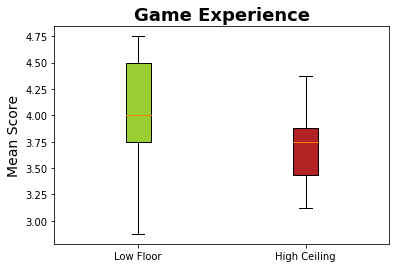

In [7]:
uGameExp = [mGameExpA, mGameExpB]
box=plt.boxplot(uGameExp, patch_artist = True)
plt.xticks([1,2], ["Low Floor", "High Ceiling"])
plt.title("Game Experience", weight = "bold").set_fontsize("18")
plt.ylabel("Mean Score").set_fontsize("14")

colors = ['yellowgreen', 'firebrick']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
#plt.savefig('Game Experience.png')
    
print("Game experince mean in Low Floor:    " + str(np.mean(mGameExpA)))
print("Game experince mean in High Ceiling: " + str(np.mean(mGameExpB)))

##### Tiredness

Tiredness mean in Low Floor:    2.65
Tiredness mean in High Ceiling: 3.2666666666666666


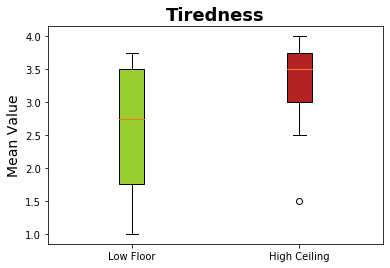

In [8]:
tTiredness = [mTirednessA, mTirednessB]
box=plt.boxplot(tTiredness, patch_artist = True)
plt.xticks([1,2], ["Low Floor", "High Ceiling"])
plt.title("Tiredness", weight = "bold").set_fontsize("18")
plt.ylabel("Mean Value").set_fontsize("14")

colors = ['yellowgreen', 'firebrick']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
#plt.savefig('Tiredness.png')

print("Tiredness mean in Low Floor:    " + str(np.mean(mTirednessA)))
print("Tiredness mean in High Ceiling: " + str(np.mean(mTirednessB)))

##### Difficulty (Trend)

Difficulty mean in Low Floor:    2.95
Difficulty mean in High Ceiling: 3.3666666666666667


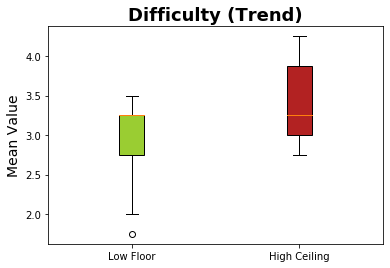

In [9]:
uDifficulty = [mDifficultyA, mDifficultyB]
box=plt.boxplot(uDifficulty, patch_artist = True)
plt.xticks([1,2], ["Low Floor", "High Ceiling"])
plt.title("Difficulty (Trend)", weight = "bold").set_fontsize("18")
plt.ylabel("Mean Value").set_fontsize("14")

colors = ['yellowgreen', 'firebrick']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

#plt.savefig('Difficulty.png')
    
print("Difficulty mean in Low Floor:    " + str(np.mean(mDifficultyA)))
print("Difficulty mean in High Ceiling: " + str(np.mean(mDifficultyB)))

##### Negative Experience

Negative Experience mean in Low Floor:    1.4333333333333333
Negative Experience mean in High Ceiling: 2.0


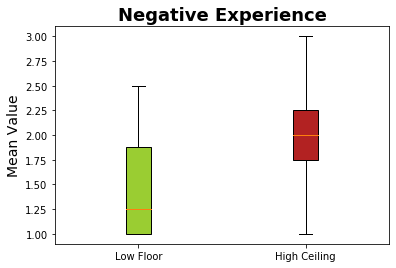

In [10]:
uNegExp = [mNegExpA, mNegExpB]
box=plt.boxplot(uNegExp, patch_artist = True)
plt.xticks([1,2], ["Low Floor", "High Ceiling"])
plt.title("Negative Experience", weight = "bold").set_fontsize("18")
plt.ylabel("Mean Value").set_fontsize("14")

colors = ['yellowgreen', 'firebrick']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

#plt.savefig('Negative Experience.png')
    
print("Negative Experience mean in Low Floor:    " + str(np.mean(mNegExpA)))
print("Negative Experience mean in High Ceiling: " + str(np.mean(mNegExpB)))

### Experience Questionnaire Conclusion

In short, the percepción of the users match with we were expecting. These participants are not very expertise users, therefore they prefer the Low Floor version of BouncingTramp, since this version represents an adequate entry-level for them. They perceive as more difficult and more demanding the High Ceiling version. Moreover, participants in the High Ceiling version perceive the Exergame as working worse.

Let's see other more objective measures, such as the time spent and the score reached in each of the trials. Once again, before analyze if the difference is significant, Shapiro test will be applied to select the proper test.

# Game Time

In [11]:
# Game Time

TimeA = 24.25, 21.4, 15.8, 19.5, 26.61538462, 16.5, 24.75, 14.66666667, 15.4375, 35.55555556, 20.75, 15.0625, 27.42857143, 43.55555556, 12.78947368
TimeB = 10.55555556, 18.94444444, 17.4375, 20.85714286, 31.16666667, 25.25, 17.4375, 12, 29.66666667, 29.16666667, 13.625, 23.84615385, 17.0625, 19.57142857, 28.75

normalityTimeA = shapiro(TimeA)
normalityTimeB = shapiro(TimeB)

print("Game Time Group A: " + str(normalityTimeA))
print("Game Time Group B: " + str(normalityTimeB))

Game Time Group A: (0.8795434236526489, 0.04670707508921623)
Game Time Group B: (0.9424691796302795, 0.4144359827041626)


In [12]:
utestTime = utest(TimeA, TimeB)
print("Game Time: " + str(utestTime))

Game Time: MannwhitneyuResult(statistic=112.0, pvalue=0.5)


# Score

In [13]:
# Score

ScoreA = 30, 22.33333333, 3.333333333, 9.285714286, 16.15384615, 11.42857143, 14.0625, 7.777777778, 3.75, 40.55555556, 19.16666667, 1.5625, 15.71428571, 37.22222222, 6.052631579
ScoreB = 2.5, 9.444444444, 3.4375, 8.214285714, 15.41666667, 8.333333333, 13.75, 2.941176471, 23.75, 9.166666667, 5.625, 18.84615385, 4.6875, 12.14285714, 26.66666667

normalityScoreA = shapiro(ScoreA)
normalityScoreB = shapiro(ScoreB)

print("Score Grupo A: " + str(normalityScoreA))
print("Score Grupo B: " + str(normalityScoreB))

Score Grupo A: (0.909282922744751, 0.13202422857284546)
Score Grupo B: (0.9104892611503601, 0.13776934146881104)


In [14]:
utestScore = utest(ScoreA, ScoreB)
print("Score: " + str(utestScore))

Score: MannwhitneyuResult(statistic=87.0, pvalue=0.14987918504435754)


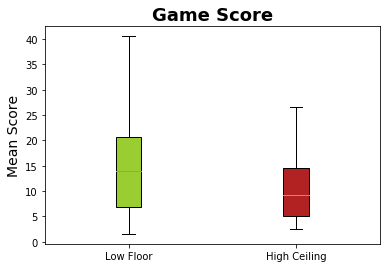

In [15]:
uScore = [ScoreA, ScoreB]
box=plt.boxplot(uScore, patch_artist=True)
plt.xticks([1,2], ["Low Floor", "High Ceiling"])
plt.title("Game Score", weight = "bold").set_fontsize("18")
plt.ylabel("Mean Score").set_fontsize("14")

colors = ['yellowgreen', 'firebrick']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

### Game Time and Score Conclusion

Contrary to our expectancy, the time spent in the trials and the score reached does not differ between the two versions. However, we should have into account that during the 6 minutes playing BouncinTramp in any of its versions, externals variables such as tiredness or practice might be interfering.
Because of that, we decided to analyze the effect of the practice by dividing the number of trials in thirds. Thus, we can compare segments intra and inter-groups.

# Practice

To analyze the practice effect, a global performance score will be defined. This score represents the mean score for a given segment in each of the participants.

### Grupo A (Low Floor)

In [16]:
ScoreA = np.array([[15, 15, 5, 45, 15, 25, 15, 10, 15, 25, 110, 65],
                  [15, 25, 25, 0, 15, 25, 10, 10, 10, 60, 15, 0, 10, 50, 65],
                  [10, 10, 0, 0, 5, 0, 0, 0, 5, 10, 0, 5, 0, 0, 5],
                  [5, 5, 0, 10, 0, 5, 5, 10, 10, 10, 5, 5, 50, 10],
                  [5, 5, 0, 15, 10, 5, 25, 15, 65, 15, 0, 50, 0],
                  [15, 5, 15, 10, 10, 5, 10, 5, 10, 20, 5, 10, 25, 15],
                  [60, 5, 10, 0, 0, 15, 10, 0, 5, 5, 15, 10, 0, 10, 0, 80],
                  [10, 0, 15, 0, 10, 0, 0, 5, 0, 5, 5, 0, 10, 5, 10, 15, 0, 50],
                  [5, 10, 0, 0, 10, 0, 5, 5, 5, 0, 5, 0, 0, 5, 5, 5],
                  [15, 45, 45, 90, 15, 15, 45, 80, 15],
                  [15, 10, 45, 5, 5, 10, 75, 15, 15, 15, 0, 20],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 10, 0],
                  [5, 10, 40, 10, 5, 5, 10, 5, 15, 5, 5, 30, 5, 70],
                  [15, 5, 85, 80, 45, 10, 5, 0, 90],
                  [20, 0, 15, 5, 0, 5, 5, 5, 0, 5, 0, 0, 5, 10, 10, 5, 15, 5, 5]])

##### Defining first and third segment

In [17]:
newlist = []

for i in ScoreA:
    rendA1 = i[0:(round(len(i)/3))]
    newlist.append(rendA1)
    
PerformanceA1 = np.array(newlist)

In [18]:
PerformanceMA1 = []

for i in PerformanceA1:
    i = np.sum(i) / len(i)
    PerformanceMA1.append(i)

PerformanceMA1

[20.0,
 16.0,
 5.0,
 4.0,
 6.25,
 11.0,
 15.0,
 5.833333333333333,
 5.0,
 35.0,
 18.75,
 0.0,
 14.0,
 35.0,
 7.5]

In [19]:
newlist2 = []

for i in ScoreA:
    rendA3 = i[-(round(len(i)/3)):]
    newlist2.append(rendA3)
    
PerformanceA3 = np.array(newlist2)

In [20]:
PerformanceMA3 = []

for i in PerformanceA3:
    i = np.sum(i) / len(i)
    PerformanceMA3.append(i)

PerformanceMA3

[53.75,
 28.0,
 2.0,
 16.0,
 16.25,
 15.0,
 20.0,
 15.0,
 3.0,
 46.666666666666664,
 12.5,
 5.0,
 23.0,
 31.666666666666668,
 8.333333333333334]

##### Normality Test in first and third segment of trials of Low Floor group

In [21]:
normalityPerformanceA1 = shapiro(PerformanceMA1)
normalityPerformanceA3 = shapiro(PerformanceMA3)
print(normalityPerformanceA1)
print(normalityPerformanceA3)

(0.8720821142196655, 0.03620605915784836)
(0.8982687592506409, 0.08955461531877518)


##### Manm-Witney U test to analyze practice in Low Floor

No significant difference between first and third segments of Low Floor group. Therefore, there is no practice effect.

In [22]:
LearningA = utest(PerformanceMA1, PerformanceMA3)
print("Prctice effect in Low Floor: " + str(LearningA))

Prctice effect in Low Floor: MannwhitneyuResult(statistic=83.0, pvalue=0.11422939071008675)


### Grupo B (High Ceiling) 

In [23]:
ScoreB = np.array([[5, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 15, 10, 0, 5, 0, 0],
                  [0, 5, 5, 5, 15, 5, 5, 5, 15, 15, 15, 0, 10, 0, 5, 10, 5, 50],
                  [0, 0, 0, 5, 10, 5, 0, 0, 10, 0, 0, 0, 15, 0, 5, 5],
                  [0, 0, 0, 0, 10, 5, 5, 15, 0, 80, 0, 0, 0, 0],
                  [5, 0, 5, 10, 15, 5, 0, 15, 45, 0, 0, 85],
                  [10, 10, 0, 5, 10, 5, 10, 0, 5, 0, 0, 45],
                  [25, 10, 10, 10, 10, 30, 10, 15, 20, 5, 10, 5, 10, 10, 0, 40],
                  [0, 0, 5, 0, 5, 0, 10, 0, 0, 0, 15, 0, 0, 5, 0, 5, 5],
                  [10, 10, 0, 10, 45, 0, 45, 0, 45, 5, 0, 115],
                  [5, 10, 0, 5, 0, 0, 0, 15, 10, 0, 10, 55],
                  [0, 5, 0, 0, 5, 5, 0, 5, 5, 10, 10, 15, 0, 5, 15, 10],
                  [10, 45, 0, 15, 0, 0, 0, 5, 40, 40, 5, 40, 45],
                  [10, 0, 0, 0, 10, 0, 10, 0, 0, 5, 10, 10, 5, 5, 0, 10],
                  [5, 5, 10, 5, 5, 5, 10, 0, 0, 40, 45, 15, 10, 15],
                  [5, 45, 5, 5, 20, 15, 10, 40, 90, 5, 5, 75]])

##### Defining first and third segment

In [24]:
newlist3 = []

for i in ScoreB:
    rendB1 = i[0:(round(len(i)/3))]
    newlist3.append(rendB1)
    
PerformanceB1 = np.array(newlist3)

In [25]:
PerformanceMB1 = []

for i in PerformanceB1:
    i = np.sum(i) / len(i)
    PerformanceMB1.append(i)

PerformanceMB1

[1.6666666666666667,
 5.833333333333333,
 3.0,
 2.0,
 5.0,
 6.25,
 13.0,
 1.6666666666666667,
 7.5,
 5.0,
 2.0,
 17.5,
 4.0,
 6.0,
 15.0]

In [26]:
newlist4 = []

for i in ScoreB:
    rendB3 = i[-(round(len(i)/3)):]
    newlist4.append(rendB3)
    
PerformanceB3 = np.array(newlist4)

In [27]:
PerformanceMB3 = []

for i in PerformanceB3:
    i = np.sum(i) / len(i)
    PerformanceMB3.append(i)

PerformanceMB3

[5.0,
 13.333333333333334,
 5.0,
 16.0,
 32.5,
 12.5,
 13.0,
 2.5,
 41.25,
 18.75,
 9.0,
 32.5,
 6.0,
 25.0,
 43.75]

##### Normality Test in first and third segment of trials of High Ceiling group

In [28]:
normalityPerformanceB1 = shapiro(PerformanceMB1)
normalityPerformanceB3 = shapiro(PerformanceMB3)
print(normalityPerformanceB1)
print(normalityPerformanceB3)

(0.8314818143844604, 0.009598048403859138)
(0.898311972618103, 0.08969055116176605)


##### Manm-Witney U test to analyze practice in High Ceiling group

Significant difference founded between first and third segments of High Ceiling group. Therefore, there is a practice effect.

In [29]:
LearningB = utest(PerformanceMB1, PerformanceMB3)
print("Practice effect in High Ceiling group: " + str(LearningB))

Practice effect in High Ceiling group: MannwhitneyuResult(statistic=44.0, pvalue=0.002362360235282355)


6.361111111111111
18.40555555555556


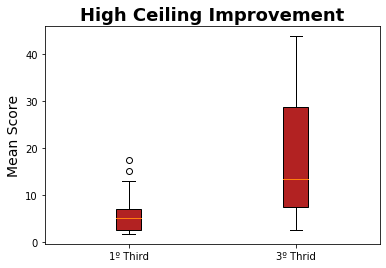

In [30]:
BoxLearningB = [PerformanceMB1, PerformanceMB3]
box=plt.boxplot(BoxLearningB, patch_artist=True)
plt.xticks([1,2], ["1º Third", "3º Thrid"])
plt.title("High Ceiling Improvement", weight = "bold").set_fontsize("18")
plt.ylabel("Mean Score").set_fontsize("14")

colors = ['firebrick', 'firebrick']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
plt.savefig('High Ceiling Learning.png')
    
print(np.mean(PerformanceMB1))
print(np.mean(PerformanceMB3))

## Game Score in the first segments

Let's compare the performance in the first segments in each of the version of BouncingTramp. Unlike the previous analysis of the global performance, now the results will be free of external variables such as tiredness or practise.

In [31]:
FirstSegments = utest(PerformanceMA1, PerformanceMB1)
print("Performance in the first segments, between grupos: " + str(FirstSegments))

Performance in the first segments, between grupos: MannwhitneyuResult(statistic=62.5, pvalue=0.01982928280121895)


Mean performance in segment 1 of Low Floor: 13.222222222222221
Mean performance in segment 1 of High Ceiling: 6.361111111111111


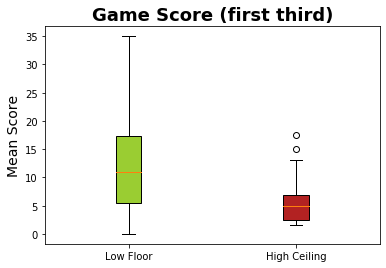

In [32]:
uScoreTercio1 = [PerformanceMA1, PerformanceMB1]
box=plt.boxplot(uScoreTercio1, patch_artist=True)
plt.xticks([1,2], ["Low Floor", "High Ceiling"])
plt.title("Game Score (first third)", weight = "bold").set_fontsize("18")
plt.ylabel("Mean Score").set_fontsize("14")

colors = ['yellowgreen', 'firebrick']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.savefig('Game Score (first third).png')

print("Mean performance in segment 1 of Low Floor: " + str(np.mean(PerformanceMA1)))
print("Mean performance in segment 1 of High Ceiling: " + str(np.mean(PerformanceMB1)))

### Game Score in the third segments
However, the score in the third segments becomes equal for both groups. This is due to the practice along the trails in the High Ceiling version, since users playing the Low Floor version do not need the practice to play.
Moreover, players in the Low Floor version could get tired due to keep playing the Exergame longer, while players in High Ceiling version can rest between trials.

In [33]:
ThirdSegments = utest(PerformanceMA3, PerformanceMB3)
print("Performance in the third segments, between grupos: " + str(ThirdSegments))
print("Mean performance in segment 3 of Low Floor: " + str(np.mean(PerformanceMA3)))
print("Mean performance in segment 3 of Low Floor: " + str(np.mean(PerformanceMB3)))

Performance in the third segments, between grupos: MannwhitneyuResult(statistic=107.0, pvalue=0.41778035938861174)
Mean performance in segment 3 of Low Floor: 19.744444444444444
Mean performance in segment 3 of Low Floor: 18.40555555555556


# Non-significant different dimensions

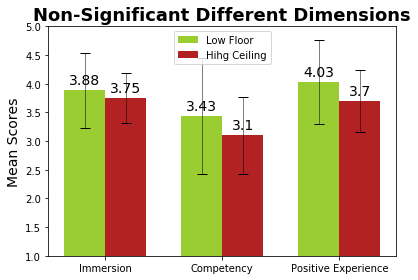

In [34]:
labels = ['Immersion', 'Competency', 'Positive Experience']
LF_means = [np.mean(mImmersionA), np.mean(mCompetencyA), np.mean(mPosExpA)]
HC_means = [np.mean(mImmersionB), np.mean(mCompetencyB), np.mean(mPosExpB)]
LF_std = [np.std(mImmersionA), np.std(mCompetencyA), np.std(mPosExpA)]
HC_std = [np.std(mImmersionB), np.std(mCompetencyB), np.std(mPosExpB)]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, LF_means, width, label='Low Floor', color = 'yellowgreen', yerr= LF_std, error_kw=dict(lw=0.5, capsize=5, capthick=1))
rects2 = ax.bar(x + width/2, HC_means, width, label='Hihg Ceiling', color = 'firebrick', yerr= HC_std, error_kw=dict(lw=0.5, capsize=5, capthick=1))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Scores').set_fontsize("14")
ax.set_title('Non-Significant Different Dimensions', weight = "bold").set_fontsize("18")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc = 'upper center')
ax.set_ylim(1,5)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom').set_fontsize("14")
        
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('NonSignificant.png')
plt.show()
